In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Ireland_2018

In [5]:
Ireland_2018

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
29,29,A Balbirnie (IRE),13,13,0,489,105,37.61,681,71.80,...,-,-,-,-,-,-,-,-,8,0
54,54,PKD Chase (IRE),6,2,1,4,4*,4.00,4,100.00,...,291,7,2/50,41.57,5.59,44.5,0,0,2,0
84,84,GH Dockrell (IRE),6,4,3,24,14,24.00,42,57.14,...,273,5,2/43,54.60,4.78,68.4,0,0,2,0
136,136,EC Joyce (IRE),6,6,2,273,116*,68.25,359,76.04,...,-,-,-,-,-,-,-,-,1,0
159,159,AR McBrine (IRE),11,8,4,66,16,16.50,117,56.41,...,377,11,3/38,34.27,4.01,51.1,0,0,8,0
177,177,BJ McCarthy (IRE),8,3,1,7,5,3.50,14,50.00,...,391,14,2/26,27.92,5.26,31.8,0,0,3,0
209,209,TJ Murtagh (IRE),9,5,2,13,4*,4.33,42,30.95,...,329,19,4/30,17.31,4.06,25.5,3,0,4,0
228,228,KJ O'Brien (IRE),13,13,2,332,50*,30.18,266,124.81,...,386,12,4/41,32.16,5.26,36.6,1,0,3,0
229,229,NJ O'Brien (IRE),13,13,0,289,70,22.23,334,86.52,...,-,-,-,-,-,-,-,-,23,3
242,242,WTS Porterfield (IRE),13,13,0,450,139,34.61,587,76.66,...,-,-,-,-,-,-,-,-,4,0


In [6]:
Ireland_2018=Ireland_2018.reset_index()

In [7]:
Ireland_2018

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,29,29,A Balbirnie (IRE),13,13,0,489,105,37.61,681,...,-,-,-,-,-,-,-,-,8,0
1,54,54,PKD Chase (IRE),6,2,1,4,4*,4.00,4,...,291,7,2/50,41.57,5.59,44.5,0,0,2,0
2,84,84,GH Dockrell (IRE),6,4,3,24,14,24.00,42,...,273,5,2/43,54.60,4.78,68.4,0,0,2,0
3,136,136,EC Joyce (IRE),6,6,2,273,116*,68.25,359,...,-,-,-,-,-,-,-,-,1,0
4,159,159,AR McBrine (IRE),11,8,4,66,16,16.50,117,...,377,11,3/38,34.27,4.01,51.1,0,0,8,0
5,177,177,BJ McCarthy (IRE),8,3,1,7,5,3.50,14,...,391,14,2/26,27.92,5.26,31.8,0,0,3,0
6,209,209,TJ Murtagh (IRE),9,5,2,13,4*,4.33,42,...,329,19,4/30,17.31,4.06,25.5,3,0,4,0
7,228,228,KJ O'Brien (IRE),13,13,2,332,50*,30.18,266,...,386,12,4/41,32.16,5.26,36.6,1,0,3,0
8,229,229,NJ O'Brien (IRE),13,13,0,289,70,22.23,334,...,-,-,-,-,-,-,-,-,23,3
9,242,242,WTS Porterfield (IRE),13,13,0,450,139,34.61,587,...,-,-,-,-,-,-,-,-,4,0


In [8]:
Ireland_2018.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Ireland_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,A Balbirnie (IRE),13,13,0,489,105,37.61,681,71.80,2,...,-,-,-,-,-,-,-,-,8,0
1,PKD Chase (IRE),6,2,1,4,4*,4.00,4,100.00,0,...,291,7,2/50,41.57,5.59,44.5,0,0,2,0
2,GH Dockrell (IRE),6,4,3,24,14,24.00,42,57.14,0,...,273,5,2/43,54.60,4.78,68.4,0,0,2,0
3,EC Joyce (IRE),6,6,2,273,116*,68.25,359,76.04,1,...,-,-,-,-,-,-,-,-,1,0
4,AR McBrine (IRE),11,8,4,66,16,16.50,117,56.41,0,...,377,11,3/38,34.27,4.01,51.1,0,0,8,0
5,BJ McCarthy (IRE),8,3,1,7,5,3.50,14,50.00,0,...,391,14,2/26,27.92,5.26,31.8,0,0,3,0
6,TJ Murtagh (IRE),9,5,2,13,4*,4.33,42,30.95,0,...,329,19,4/30,17.31,4.06,25.5,3,0,4,0
7,KJ O'Brien (IRE),13,13,2,332,50*,30.18,266,124.81,0,...,386,12,4/41,32.16,5.26,36.6,1,0,3,0
8,NJ O'Brien (IRE),13,13,0,289,70,22.23,334,86.52,0,...,-,-,-,-,-,-,-,-,23,3
9,WTS Porterfield (IRE),13,13,0,450,139,34.61,587,76.66,2,...,-,-,-,-,-,-,-,-,4,0


In [10]:
Ireland_2018_players =Ireland_2018.copy()

In [11]:
Ireland_2018_players.drop('Player',axis=1,inplace=True)

In [12]:
Ireland_2018_players.HS=Ireland_2018_players.HS.str.extract('(\d+)')
Ireland_2018_players['HS'].fillna(value=0, inplace=True)


In [13]:
Ireland_2018_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,13,13,0,489,105,37.61,681,71.80,2,3,...,-,-,-,-,-,-,-,-,8,0
1,6,2,1,4,4,4.00,4,100.00,0,0,...,291,7,2/50,41.57,5.59,44.5,0,0,2,0
2,6,4,3,24,14,24.00,42,57.14,0,0,...,273,5,2/43,54.60,4.78,68.4,0,0,2,0
3,6,6,2,273,116,68.25,359,76.04,1,2,...,-,-,-,-,-,-,-,-,1,0
4,11,8,4,66,16,16.50,117,56.41,0,0,...,377,11,3/38,34.27,4.01,51.1,0,0,8,0
5,8,3,1,7,5,3.50,14,50.00,0,0,...,391,14,2/26,27.92,5.26,31.8,0,0,3,0
6,9,5,2,13,4,4.33,42,30.95,0,0,...,329,19,4/30,17.31,4.06,25.5,3,0,4,0
7,13,13,2,332,50,30.18,266,124.81,0,1,...,386,12,4/41,32.16,5.26,36.6,1,0,3,0
8,13,13,0,289,70,22.23,334,86.52,0,3,...,-,-,-,-,-,-,-,-,23,3
9,13,13,0,450,139,34.61,587,76.66,2,1,...,-,-,-,-,-,-,-,-,4,0


In [14]:
Ireland_2018_players.replace("-",0,inplace=True)

In [15]:
Ireland_2018_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Ireland_2018_players_scaled = pd.DataFrame(scaler.fit_transform(Ireland_2018_players),columns=Ireland_2018_players.columns)
Ireland_2018_players_scaled.shape
Ireland_2018_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.964618,1.198441,-1.166667,1.711982,1.139887,0.876006,1.990222,0.226333,2.247806,1.962046,...,-0.697368,-1.039912,-0.906861,-1.024290,-1.180325,-1.088035,-0.454859,0.0,0.530161,-0.267261
1,-0.983169,-1.336723,-0.333333,-1.008566,-0.955900,-1.020414,-1.036239,1.183241,-0.561951,-0.797081,...,-0.174342,0.626467,0.035915,1.092630,1.130445,0.868493,-0.454859,0.0,-0.605898,-0.267261
2,-0.983169,-0.875784,1.333333,-0.896379,-0.748396,0.108071,-0.866364,-0.271124,-0.561951,-0.797081,...,-0.174342,0.523392,-0.233449,1.756173,0.795610,1.919303,-0.454859,0.0,-0.605898,-0.267261
3,-0.983169,-0.414845,0.500000,0.500356,1.368141,2.604846,0.550753,0.370208,0.842927,1.042337,...,-0.697368,-1.039912,-0.906861,-1.024290,-1.180325,-1.088035,-0.454859,0.0,-0.795242,-0.267261
4,0.408108,0.046094,2.166667,-0.660785,-0.706896,-0.315111,-0.531084,-0.295895,-0.561951,-0.797081,...,0.610197,1.118936,0.574644,0.720883,0.477311,1.158675,-0.454859,0.0,0.530161,-0.267261


In [17]:
Ireland_2018_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,...,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,15.0,1.500000e+01,1.500000e+01
mean,5.181041e-17,8.881784e-17,7.401487e-17,-7.401487e-17,-4.857226e-17,-4.070818e-17,-5.551115e-17,1.646831e-16,-2.220446e-17,-4.810966e-17,...,8.881784e-17,4.440892e-17,7.401487e-18,1.480297e-16,4.440892e-17,4.440892e-17,7.401487e-18,0.0,-5.551115e-18,-3.700743e-17
std,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,...,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,1.035098e+00,0.0,1.035098e+00,1.035098e+00
min,-2.374445e+00,-1.567192e+00,-1.166667e+00,-1.031004e+00,-1.038901e+00,-1.246112e+00,-1.049650e+00,-2.210052e+00,-5.619515e-01,-7.970811e-01,...,-6.973680e-01,-1.039912e+00,-9.068605e-01,-1.024290e+00,-1.180325e+00,-1.088035e+00,-4.548588e-01,0.0,-9.845848e-01,-2.672612e-01
25%,-8.440411e-01,-7.605490e-01,-7.500000e-01,-9.749098e-01,-9.455248e-01,-1.011104e+00,-9.110676e-01,-4.046502e-01,-5.619515e-01,-7.970811e-01,...,-6.973680e-01,-1.039912e+00,-9.068605e-01,-1.024290e+00,-1.180325e+00,-1.088035e+00,-4.548588e-01,0.0,-5.112267e-01,-2.672612e-01
50%,4.081078e-01,-1.843755e-01,-3.333333e-01,-2.625189e-01,-1.051352e-01,4.205490e-02,-1.734515e-01,1.496442e-01,-5.619515e-01,-7.970811e-01,...,-1.743420e-01,-1.179636e-01,-2.334492e-01,-1.137647e-01,4.773111e-01,2.001960e-01,-4.548588e-01,0.0,-2.272119e-01,-2.672612e-01
75%,9.646184e-01,1.198441e+00,5.000000e-01,7.107081e-01,7.767552e-01,5.817532e-01,4.948733e-01,4.636935e-01,1.404879e-01,5.824824e-01,...,8.717101e-02,9.815026e-01,6.419854e-01,6.671584e-01,8.948206e-01,6.948239e-01,-4.548588e-01,0.0,1.514746e-01,-2.672612e-01
max,9.646184e-01,1.198441e+00,2.166667e+00,1.711982e+00,1.845399e+00,2.604846e+00,1.990222e+00,2.025117e+00,2.247806e+00,1.962046e+00,...,2.702301e+00,1.594226e+00,2.190831e+00,1.827467e+00,1.390871e+00,1.919303e+00,2.956582e+00,0.0,3.370310e+00,3.741657e+00


In [18]:
X =  Ireland_2018_players_scaled.iloc[:,:].values

In [19]:
X

array([[ 9.64618393e-01,  1.19844091e+00, -1.16666667e+00,
         1.71198203e+00,  1.13988653e+00,  8.76005881e-01,
         1.99022234e+00,  2.26332639e-01,  2.24780595e+00,
         1.96204589e+00,  3.53553391e-01,  1.68136605e+00,
        -2.01045173e-01, -1.88093317e+00,  9.64618393e-01,
        -1.09764654e+00, -1.01524820e+00, -6.97368044e-01,
        -1.03991177e+00, -9.06860519e-01, -1.02429010e+00,
        -1.18032540e+00, -1.08803470e+00, -4.54858826e-01,
         0.00000000e+00,  5.30161056e-01, -2.67261242e-01],
       [-9.83168747e-01, -1.33672256e+00, -3.33333333e-01,
        -1.00856608e+00, -9.55899995e-01, -1.02041444e+00,
        -1.03623886e+00,  1.18324125e+00, -5.61951487e-01,
        -7.97081141e-01,  3.53553391e-01, -8.30430794e-01,
        -8.71195751e-01, -1.60754172e+00, -9.83168747e-01,
         2.93736397e-01,  3.10540509e-01, -1.74342011e-01,
         6.26466672e-01,  3.59152681e-02,  1.09263042e+00,
         1.13044474e+00,  8.68493214e-01, -4.54858826e-

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Ireland_2018_players_scaled))

False

In [23]:
Ireland_2018_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.964618,1.198441,-1.166667,1.711982,1.139887,0.876006,1.990222,0.226333,2.247806,1.962046,...,-0.697368,-1.039912,-0.906861,-1.024290,-1.180325,-1.088035,-0.454859,0.0,0.530161,-0.267261
1,-0.983169,-1.336723,-0.333333,-1.008566,-0.955900,-1.020414,-1.036239,1.183241,-0.561951,-0.797081,...,-0.174342,0.626467,0.035915,1.092630,1.130445,0.868493,-0.454859,0.0,-0.605898,-0.267261
2,-0.983169,-0.875784,1.333333,-0.896379,-0.748396,0.108071,-0.866364,-0.271124,-0.561951,-0.797081,...,-0.174342,0.523392,-0.233449,1.756173,0.795610,1.919303,-0.454859,0.0,-0.605898,-0.267261
3,-0.983169,-0.414845,0.500000,0.500356,1.368141,2.604846,0.550753,0.370208,0.842927,1.042337,...,-0.697368,-1.039912,-0.906861,-1.024290,-1.180325,-1.088035,-0.454859,0.0,-0.795242,-0.267261
4,0.408108,0.046094,2.166667,-0.660785,-0.706896,-0.315111,-0.531084,-0.295895,-0.561951,-0.797081,...,0.610197,1.118936,0.574644,0.720883,0.477311,1.158675,-0.454859,0.0,0.530161,-0.267261
5,-0.426658,-1.106253,-0.333333,-0.991738,-0.935150,-1.048627,-0.991535,-0.513405,-0.561951,-0.797081,...,-0.174342,1.199105,0.978691,0.397515,0.994031,0.310113,-0.454859,0.0,-0.416555,-0.267261
6,-0.148403,-0.645314,0.500000,-0.958082,-0.955900,-1.001794,-0.866364,-1.159828,-0.561951,-0.797081,...,1.917762,0.844069,1.652102,-0.142792,0.497980,0.033122,2.956582,0.0,-0.227212,-0.267261
7,0.964618,1.198441,0.500000,0.831310,-0.001383,0.456773,0.135006,2.025117,-0.561951,0.122628,...,0.348684,1.170473,0.709327,0.613433,0.994031,0.521155,0.682288,0.0,-0.416555,-0.267261
8,0.964618,1.198441,-1.166667,0.590107,0.413624,0.008200,0.438993,0.725825,-0.561951,1.962046,...,-0.697368,-1.039912,-0.906861,-1.024290,-1.180325,-1.088035,-0.454859,0.0,3.370310,3.741657
9,0.964618,1.198441,-1.166667,1.493216,1.845399,0.706733,1.570005,0.391247,2.247806,0.122628,...,-0.697368,-1.039912,-0.906861,-1.024290,-1.180325,-1.088035,-0.454859,0.0,-0.227212,-0.267261


In [24]:
np.all(np.isfinite(Ireland_2018_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


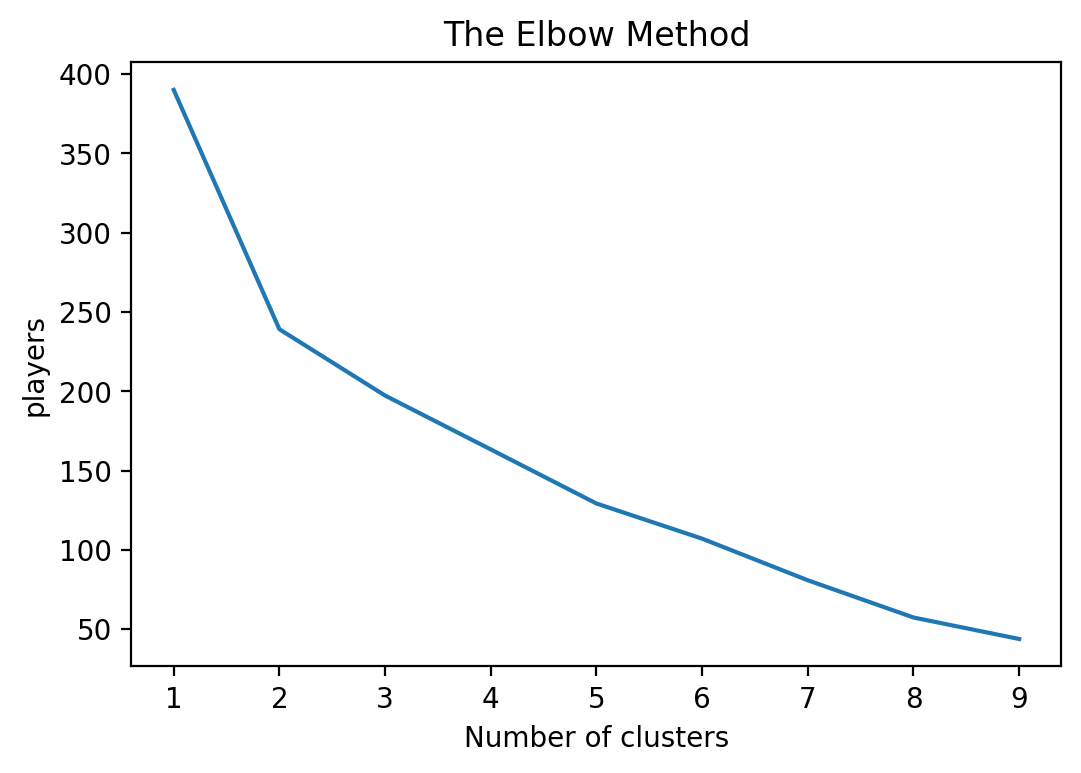

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 0, 2, 0, 1, 1])

In [28]:
kmeans.cluster_centers_

array([[-1.09447087e+00, -1.01406539e+00,  1.18423789e-16,
        -8.38041006e-01, -7.56696522e-01, -6.33005280e-01,
        -8.23447788e-01, -3.32339110e-01, -5.61951487e-01,
        -7.97081141e-01, -4.94974747e-01, -7.68917402e-01,
        -6.03135520e-01, -3.14946949e-01, -1.09447087e+00,
         1.08218672e-01,  1.48386352e-01, -2.78947218e-01,
         2.38217674e-01,  3.59152681e-02,  4.21652680e-01,
         4.07037268e-01,  4.48169465e-01, -4.54858826e-01,
         0.00000000e+00, -6.05898350e-01, -2.67261242e-01],
       [ 5.93611319e-01,  8.52736804e-01, -4.72222222e-01,
         9.95851495e-01,  1.06726027e+00,  8.64438902e-01,
         1.05590862e+00,  3.96166950e-01,  8.42927230e-01,
         1.04233688e+00,  5.30330086e-01,  9.38079230e-01,
         5.24951286e-01,  1.76793137e-01,  5.93611319e-01,
        -9.43048432e-01, -9.77004296e-01, -6.97368044e-01,
        -9.86465496e-01, -8.84413477e-01, -5.48997222e-01,
        -7.51792598e-01, -6.92332424e-01, -4.54858826e-

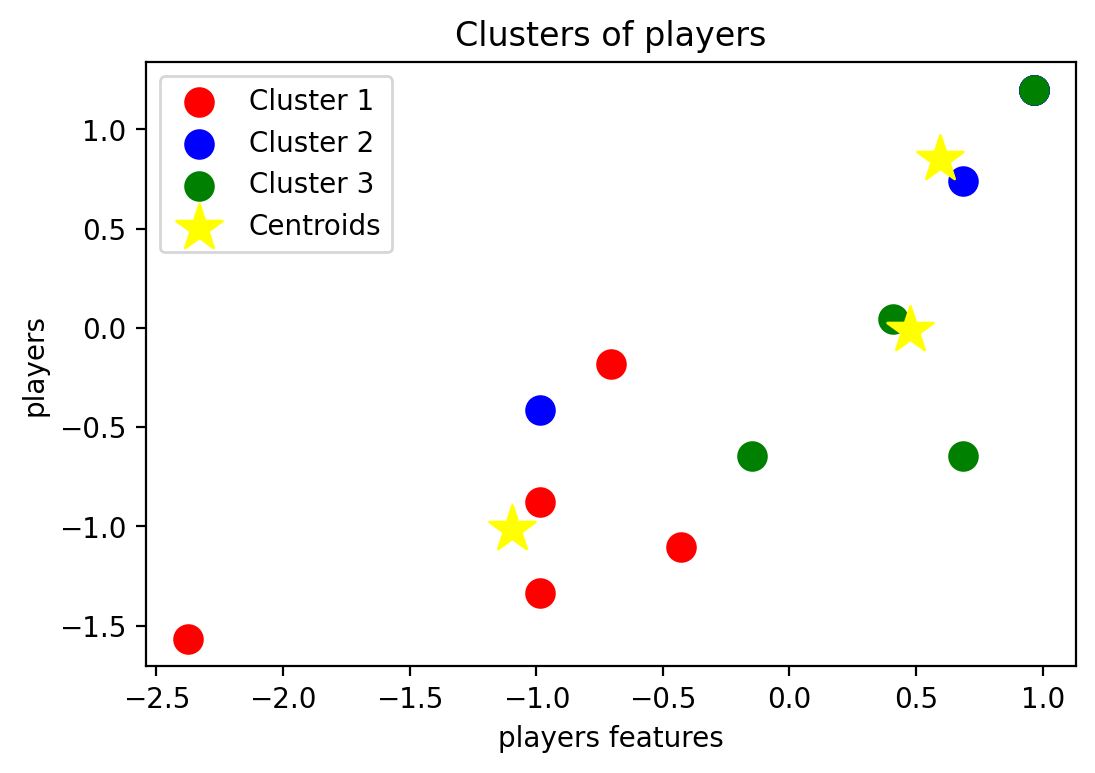

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Ireland_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,A Balbirnie (IRE),13,13,0,489,105,37.61,681,71.80,2,...,-,-,-,-,-,-,-,-,8,0
1,PKD Chase (IRE),6,2,1,4,4*,4.00,4,100.00,0,...,291,7,2/50,41.57,5.59,44.5,0,0,2,0
2,GH Dockrell (IRE),6,4,3,24,14,24.00,42,57.14,0,...,273,5,2/43,54.60,4.78,68.4,0,0,2,0
3,EC Joyce (IRE),6,6,2,273,116*,68.25,359,76.04,1,...,-,-,-,-,-,-,-,-,1,0
4,AR McBrine (IRE),11,8,4,66,16,16.50,117,56.41,0,...,377,11,3/38,34.27,4.01,51.1,0,0,8,0
5,BJ McCarthy (IRE),8,3,1,7,5,3.50,14,50.00,0,...,391,14,2/26,27.92,5.26,31.8,0,0,3,0
6,TJ Murtagh (IRE),9,5,2,13,4*,4.33,42,30.95,0,...,329,19,4/30,17.31,4.06,25.5,3,0,4,0
7,KJ O'Brien (IRE),13,13,2,332,50*,30.18,266,124.81,0,...,386,12,4/41,32.16,5.26,36.6,1,0,3,0
8,NJ O'Brien (IRE),13,13,0,289,70,22.23,334,86.52,0,...,-,-,-,-,-,-,-,-,23,3
9,WTS Porterfield (IRE),13,13,0,450,139,34.61,587,76.66,2,...,-,-,-,-,-,-,-,-,4,0


In [31]:
Ireland_2018["cluster"] = y_kmeans

In [32]:
Ireland_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,A Balbirnie (IRE),13,13,0,489,105,37.61,681,71.80,2,...,-,-,-,-,-,-,-,8,0,1
1,PKD Chase (IRE),6,2,1,4,4*,4.00,4,100.00,0,...,7,2/50,41.57,5.59,44.5,0,0,2,0,0
2,GH Dockrell (IRE),6,4,3,24,14,24.00,42,57.14,0,...,5,2/43,54.60,4.78,68.4,0,0,2,0,0
3,EC Joyce (IRE),6,6,2,273,116*,68.25,359,76.04,1,...,-,-,-,-,-,-,-,1,0,1
4,AR McBrine (IRE),11,8,4,66,16,16.50,117,56.41,0,...,11,3/38,34.27,4.01,51.1,0,0,8,0,2
5,BJ McCarthy (IRE),8,3,1,7,5,3.50,14,50.00,0,...,14,2/26,27.92,5.26,31.8,0,0,3,0,0
6,TJ Murtagh (IRE),9,5,2,13,4*,4.33,42,30.95,0,...,19,4/30,17.31,4.06,25.5,3,0,4,0,2
7,KJ O'Brien (IRE),13,13,2,332,50*,30.18,266,124.81,0,...,12,4/41,32.16,5.26,36.6,1,0,3,0,2
8,NJ O'Brien (IRE),13,13,0,289,70,22.23,334,86.52,0,...,-,-,-,-,-,-,-,23,3,1
9,WTS Porterfield (IRE),13,13,0,450,139,34.61,587,76.66,2,...,-,-,-,-,-,-,-,4,0,1


In [33]:
Ireland_2018['cluster'].value_counts()

1    6
0    5
2    4
Name: cluster, dtype: int64

In [34]:
Ireland_Cluster_2018 = np.array([5,6,4])

In [35]:
Ireland_Cluster_2018

array([5, 6, 4])

In [36]:
%store Ireland_Cluster_2018

Stored 'Ireland_Cluster_2018' (ndarray)


In [37]:
Ireland_2018_players_scaled.insert(0, 'Player', Ireland_2018.Player)

In [38]:
Ireland_2018_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,A Balbirnie (IRE),0.964618,1.198441,-1.166667,1.711982,1.139887,0.876006,1.990222,0.226333,2.247806,...,-0.697368,-1.039912,-0.906861,-1.024290,-1.180325,-1.088035,-0.454859,0.0,0.530161,-0.267261
1,PKD Chase (IRE),-0.983169,-1.336723,-0.333333,-1.008566,-0.955900,-1.020414,-1.036239,1.183241,-0.561951,...,-0.174342,0.626467,0.035915,1.092630,1.130445,0.868493,-0.454859,0.0,-0.605898,-0.267261
2,GH Dockrell (IRE),-0.983169,-0.875784,1.333333,-0.896379,-0.748396,0.108071,-0.866364,-0.271124,-0.561951,...,-0.174342,0.523392,-0.233449,1.756173,0.795610,1.919303,-0.454859,0.0,-0.605898,-0.267261
3,EC Joyce (IRE),-0.983169,-0.414845,0.500000,0.500356,1.368141,2.604846,0.550753,0.370208,0.842927,...,-0.697368,-1.039912,-0.906861,-1.024290,-1.180325,-1.088035,-0.454859,0.0,-0.795242,-0.267261
4,AR McBrine (IRE),0.408108,0.046094,2.166667,-0.660785,-0.706896,-0.315111,-0.531084,-0.295895,-0.561951,...,0.610197,1.118936,0.574644,0.720883,0.477311,1.158675,-0.454859,0.0,0.530161,-0.267261
5,BJ McCarthy (IRE),-0.426658,-1.106253,-0.333333,-0.991738,-0.935150,-1.048627,-0.991535,-0.513405,-0.561951,...,-0.174342,1.199105,0.978691,0.397515,0.994031,0.310113,-0.454859,0.0,-0.416555,-0.267261
6,TJ Murtagh (IRE),-0.148403,-0.645314,0.500000,-0.958082,-0.955900,-1.001794,-0.866364,-1.159828,-0.561951,...,1.917762,0.844069,1.652102,-0.142792,0.497980,0.033122,2.956582,0.0,-0.227212,-0.267261
7,KJ O'Brien (IRE),0.964618,1.198441,0.500000,0.831310,-0.001383,0.456773,0.135006,2.025117,-0.561951,...,0.348684,1.170473,0.709327,0.613433,0.994031,0.521155,0.682288,0.0,-0.416555,-0.267261
8,NJ O'Brien (IRE),0.964618,1.198441,-1.166667,0.590107,0.413624,0.008200,0.438993,0.725825,-0.561951,...,-0.697368,-1.039912,-0.906861,-1.024290,-1.180325,-1.088035,-0.454859,0.0,3.370310,3.741657
9,WTS Porterfield (IRE),0.964618,1.198441,-1.166667,1.493216,1.845399,0.706733,1.570005,0.391247,2.247806,...,-0.697368,-1.039912,-0.906861,-1.024290,-1.180325,-1.088035,-0.454859,0.0,-0.227212,-0.267261


In [39]:
Ireland_2018_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,A Balbirnie (IRE),0.876006,-1.024290
1,PKD Chase (IRE),-1.020414,1.092630
2,GH Dockrell (IRE),0.108071,1.756173
3,EC Joyce (IRE),2.604846,-1.024290
4,AR McBrine (IRE),-0.315111,0.720883
5,BJ McCarthy (IRE),-1.048627,0.397515
6,TJ Murtagh (IRE),-1.001794,-0.142792
7,KJ O'Brien (IRE),0.456773,0.613433
8,NJ O'Brien (IRE),0.008200,-1.024290
9,WTS Porterfield (IRE),0.706733,-1.024290


In [40]:
Ireland_2018_Ave=Ireland_2018_players_scaled.mean()

In [41]:
Ireland_2018_Ave

Mat_x           5.181041e-17
Inns_x          8.881784e-17
NO              7.401487e-17
Runs_x         -7.401487e-17
HS             -4.857226e-17
Ave_x          -4.070818e-17
BF             -5.551115e-17
SR_x            1.646831e-16
100            -2.220446e-17
50             -4.810966e-17
0               5.921189e-17
4s              0.000000e+00
6s             -1.850372e-17
Unnamed: 0_y   -4.440892e-17
Mat_y           5.181041e-17
Inns_y          0.000000e+00
Overs           7.401487e-17
Mdns            8.881784e-17
Runs_y          4.440892e-17
Wkts            7.401487e-18
Ave_y           1.480297e-16
Econ            4.440892e-17
SR_y            4.440892e-17
4               7.401487e-18
5               0.000000e+00
Ct             -5.551115e-18
St             -3.700743e-17
dtype: float64

In [42]:
Ireland_Ave_2018 =Ireland_2018_Ave[['Ave_x','Ave_y']]

In [43]:
Ireland_Ave_2018

Ave_x   -4.070818e-17
Ave_y    1.480297e-16
dtype: float64

In [44]:
Ireland_Ave_2018 = np.array([Ireland_Ave_2018.Ave_x, Ireland_Ave_2018.Ave_y])

In [45]:
Ireland_Ave_2018

array([-4.07081776e-17,  1.48029737e-16])

In [46]:
%store Ireland_Ave_2018

Stored 'Ireland_Ave_2018' (ndarray)


In [47]:
Ireland_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,A Balbirnie (IRE),13,13,0,489,105,37.61,681,71.80,2,...,-,-,-,-,-,-,-,8,0,1
1,PKD Chase (IRE),6,2,1,4,4*,4.00,4,100.00,0,...,7,2/50,41.57,5.59,44.5,0,0,2,0,0
2,GH Dockrell (IRE),6,4,3,24,14,24.00,42,57.14,0,...,5,2/43,54.60,4.78,68.4,0,0,2,0,0
3,EC Joyce (IRE),6,6,2,273,116*,68.25,359,76.04,1,...,-,-,-,-,-,-,-,1,0,1
4,AR McBrine (IRE),11,8,4,66,16,16.50,117,56.41,0,...,11,3/38,34.27,4.01,51.1,0,0,8,0,2
5,BJ McCarthy (IRE),8,3,1,7,5,3.50,14,50.00,0,...,14,2/26,27.92,5.26,31.8,0,0,3,0,0
6,TJ Murtagh (IRE),9,5,2,13,4*,4.33,42,30.95,0,...,19,4/30,17.31,4.06,25.5,3,0,4,0,2
7,KJ O'Brien (IRE),13,13,2,332,50*,30.18,266,124.81,0,...,12,4/41,32.16,5.26,36.6,1,0,3,0,2
8,NJ O'Brien (IRE),13,13,0,289,70,22.23,334,86.52,0,...,-,-,-,-,-,-,-,23,3,1
9,WTS Porterfield (IRE),13,13,0,450,139,34.61,587,76.66,2,...,-,-,-,-,-,-,-,4,0,1
